## **Nintendo Games-Score & Management Analysis**

Creating the proper directories

In [1]:
! rm -f /root/.config/kaggle
! mkdir -p /root/.config/kaggle
! cp kaggle.json /root/.config/kaggle/
! chmod 600 /root/.config/kaggle/kaggle.json
! ls -l /root/.config/kaggle/kaggle.json

-rw------- 1 root root 69 Nov 29 07:48 /root/.config/kaggle/kaggle.json


Imports for the analytics tasks we will be using

In [2]:
import numpy as np
import pandas as pd
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns

## Webscraping through Kaggle API

In [3]:
kaggle.api.dataset_download_files('joebeachcapital/nintendo-games', path='kaggle', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/nintendo-games


## Data Exploration

In [4]:
df = pd.read_csv('kaggle/NintendoGames.csv')
# PLACEHOLDER
print(df.head())
print(df.info())
print(df.isna().sum())

   meta_score                      title platform          date  user_score  \
0         NaN            Super Mario RPG   Switch  Nov 17, 2023         NaN   
1         NaN        WarioWare: Move It!   Switch   Nov 3, 2023         NaN   
2         NaN   Super Mario Bros. Wonder   Switch  Oct 20, 2023         NaN   
3         NaN  Detective Pikachu Returns   Switch   Oct 6, 2023         NaN   
4         NaN                   Fae Farm   Switch   Sep 8, 2023         NaN   

                                     link esrb_rating  \
0            /game/switch/super-mario-rpg           E   
1         /game/switch/warioware-move-it!          RP   
2    /game/switch/super-mario-bros-wonder           E   
3  /game/switch/detective-pikachu-returns         NaN   
4                   /game/switch/fae-farm        E10+   

                developers                                     genres  
0             ['Nintendo']         ['Role-Playing', 'Japanese-Style']  
1  ['Intelligent Systems']      ['Misc

Convert release date (Date) to datetime

In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

Clean data of missing values


In [6]:
df_clean = df.dropna()
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 656 entries, 5 to 1071
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   meta_score   656 non-null    float64       
 1   title        656 non-null    object        
 2   platform     656 non-null    object        
 3   date         656 non-null    datetime64[ns]
 4   user_score   656 non-null    float64       
 5   link         656 non-null    object        
 6   esrb_rating  656 non-null    object        
 7   developers   656 non-null    object        
 8   genres       656 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 51.2+ KB
None


## Timeseries exploration

Extract year for time based grouping

In [7]:
df_clean['release_year'] = df_clean['date'].dt.year
df_clean.head()

<ipython-input-7-8f5bf6d41929>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['release_year'] = df_clean['date'].dt.year


,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres,release_year
5,87.0,Pikmin 4,Switch,2023-07-21,9.0,/game/switch/pikmin-4,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']",2023
8,56.0,Everybody 1-2-Switch!,Switch,2023-06-30,5.4,/game/switch/everybody-1-2-switch!,E,['Nintendo'],"['Miscellaneous', 'Party / Minigame']",2023
9,82.0,Pikmin 1,Switch,2023-06-21,8.4,/game/switch/pikmin-1,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']",2023
10,65.0,Pikmin 2,Switch,2023-06-21,8.6,/game/switch/pikmin-2,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']",2023
12,96.0,The Legend of Zelda: Tears of the Kingdom,Switch,2023-05-12,8.2,/game/switch/the-legend-of-zelda-tears-of-the-...,E10+,['Nintendo'],"['Action Adventure', 'Open-World']",2023


Plotting & Transferring df_clean to csv (This csv will be used to combine with sales data later in the analysis)

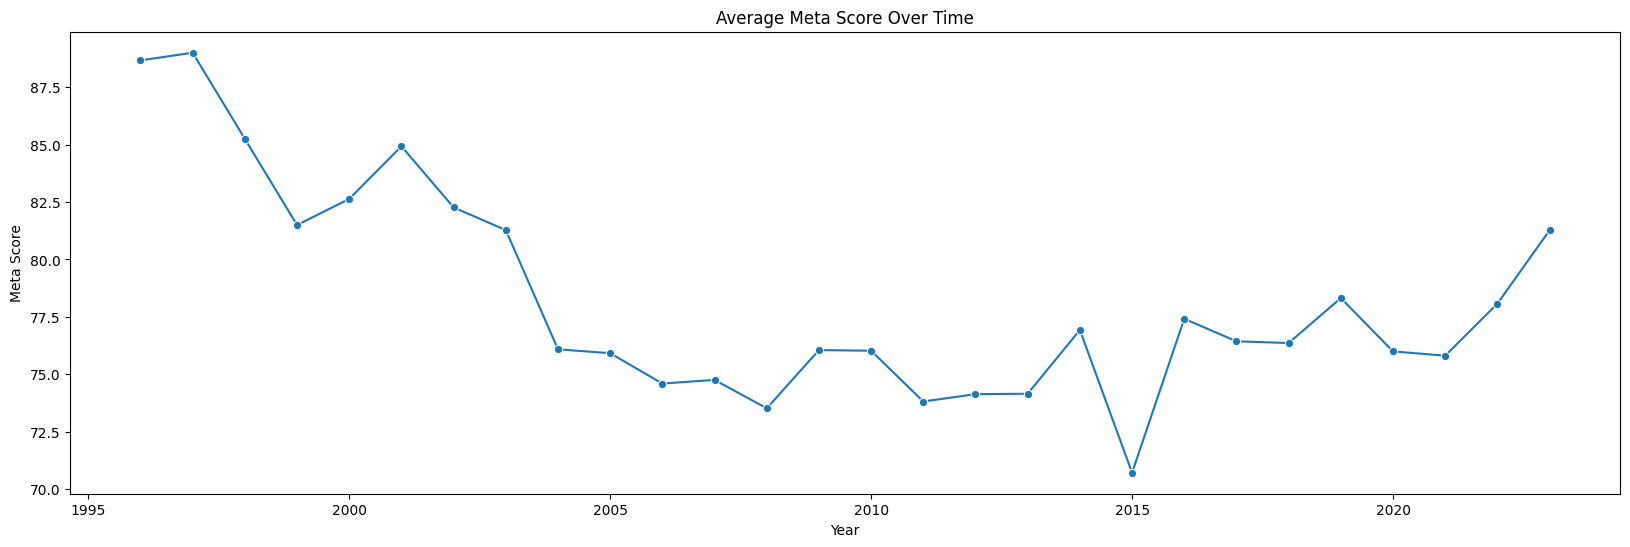

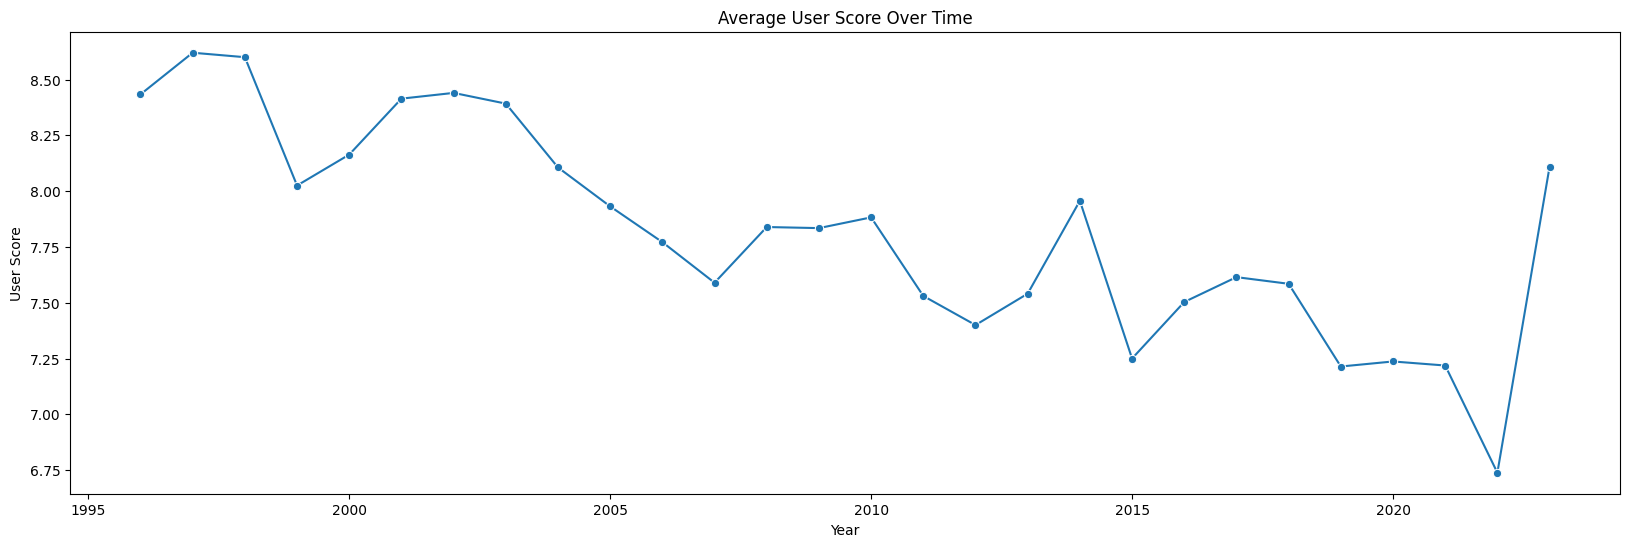

In [10]:
df_clean.to_csv('games_clean.csv', index=False)

# Averaging scores by grouped year
df_avg_meta_score = df_clean.groupby('release_year', as_index=False)['meta_score'].mean()
df_avg_user_score = df_clean.groupby('release_year', as_index=False)['user_score'].mean()

# Building & showing graph for average meta score over time
plt.figure(figsize=(20, 6))
sns.lineplot(data=df_avg_meta_score, x='release_year', y='meta_score', marker='o')
plt.title('Average Meta Score Over Time')
plt.xlabel('Year')
plt.ylabel('Meta Score')
plt.show()

# Building & showing graph for average user score over time
plt.figure(figsize=(20, 6))
sns.lineplot(data=df_avg_user_score, x='release_year', y='user_score', marker='o')
plt.title('Average User Score Over Time')
plt.xlabel('Year')
plt.ylabel('User Score')
plt.show()

We examine a gradual decline in both user and meta scores over time, with a short upwards trend in meta scores in our recent data

## Exploratory Data Analytics

Grouping by platform to see if we can identify any specific trends

In [9]:
platform_yearly_scores = df_clean.groupby(['platform', 'release_year'])[['meta_score', 'user_score']].mean().reset_index()
print(platform_yearly_scores.head())

  platform  release_year  meta_score  user_score
0      3DS          2011   71.500000    7.294444
1      3DS          2012   72.352941    7.070588
2      3DS          2013   76.000000    7.570588
3      3DS          2014   73.550000    7.670000
4      3DS          2015   70.368421    7.126316


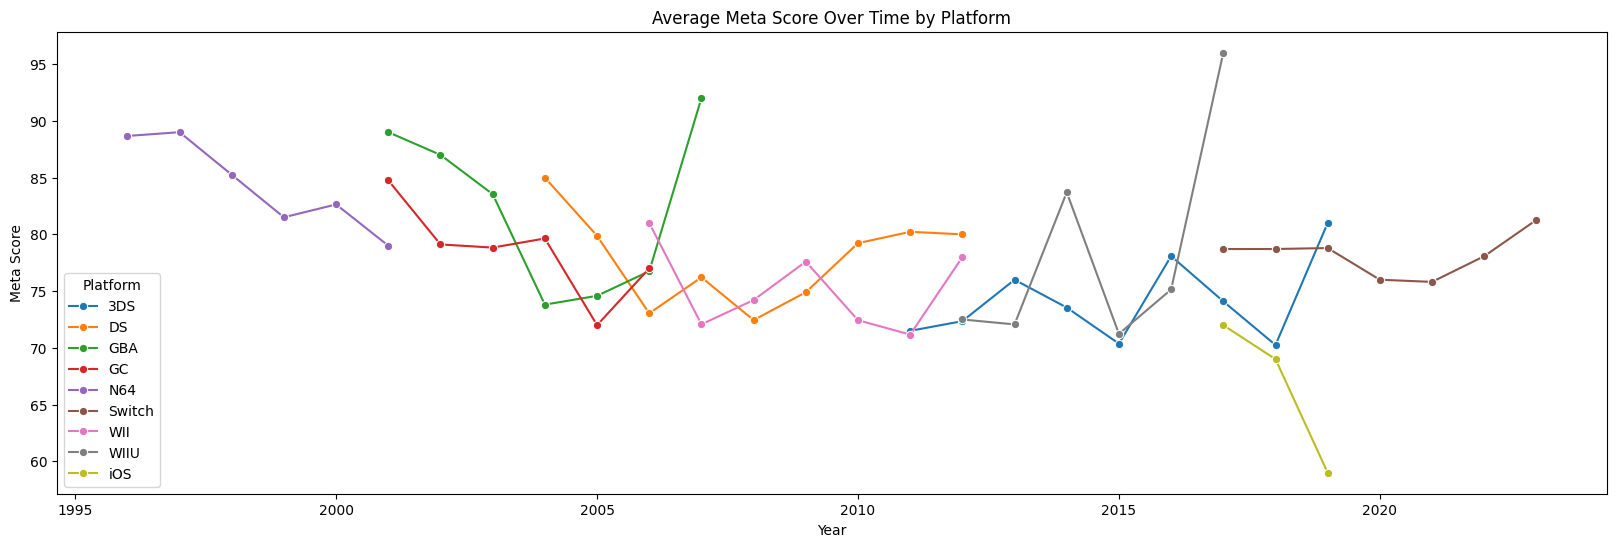

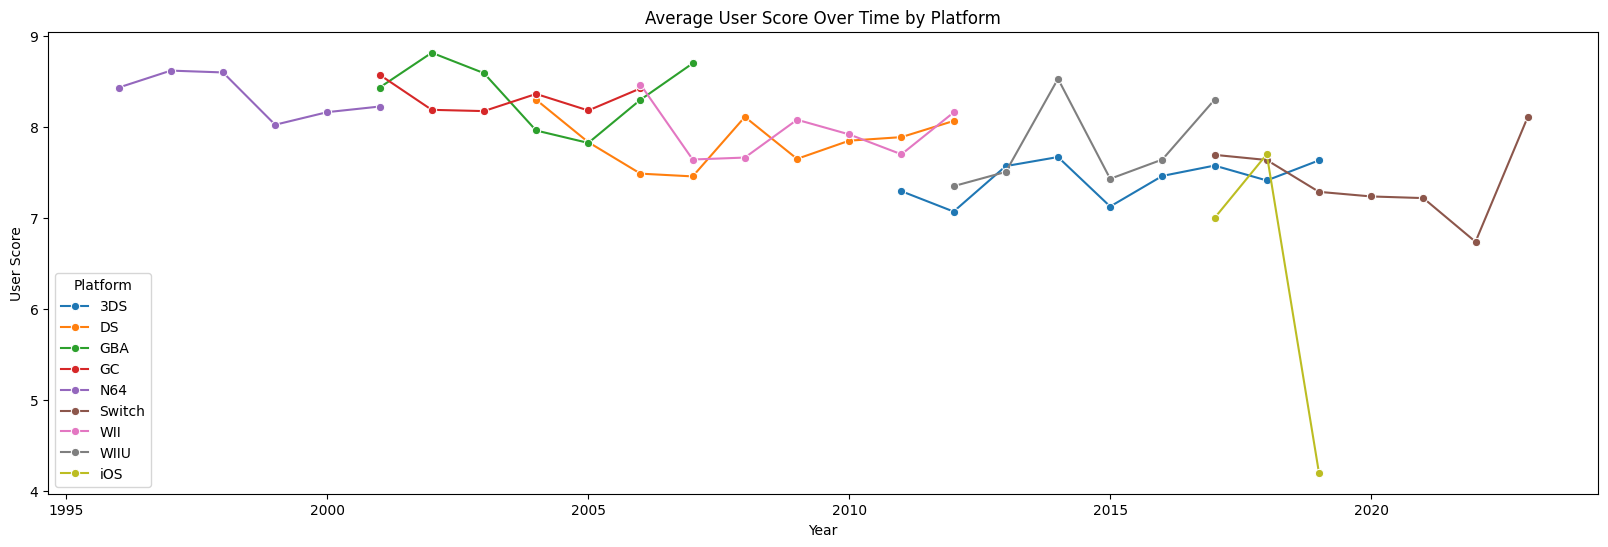

In [10]:
# Graph for Average Meta Score over time by Platform
plt.figure(figsize=(20, 6))
# Hue allows different lines grouped by the 'platform' as specified
sns.lineplot(data=platform_yearly_scores, x='release_year', y='meta_score', hue='platform', marker='o')
plt.title('Average Meta Score Over Time by Platform')
plt.xlabel('Year')
plt.ylabel('Meta Score')
plt.legend(title='Platform')
plt.show()

# Graph for Average User Score over time by Platform
plt.figure(figsize=(20, 6))
sns.lineplot(data=platform_yearly_scores, x='release_year', y='user_score', hue='platform', marker='o')
plt.title('Average User Score Over Time by Platform')
plt.xlabel('Year')
plt.ylabel('User Score')
plt.legend(title='Platform')
plt.show()


No distinct trends where one platform drastically lags behind or above the rest, although we do see the Nintendo Switch Meta Scores slightly above what we'd expect for the trend at that time

Group by genres


In [11]:
# Check if 'genres' is a string and convert it into a list if needed
df_clean_copy = df_clean.copy()
df_clean_copy['genres'] = df_clean_copy['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Explode the 'genres' column into multiple rows
df_exploded = df_clean_copy.explode('genres')

Genre Scores

In [12]:
genres_yearly_scores = df_exploded.groupby(['genres', 'release_year'])[['meta_score', 'user_score']].mean().reset_index()
print(genres_yearly_scores)

           genres  release_year  meta_score  user_score
0                          2017        85.0    8.700000
1                          2021        88.0    8.700000
2              2D          1998        65.0    7.400000
3              2D          2001        86.0    8.500000
4              2D          2002        88.0    8.933333
..            ...           ...         ...         ...
856  Virtual Life          2017        72.0    6.800000
857  Virtual Life          2020        90.0    5.600000
858  Virtual Life          2021        69.0    7.000000
859  Visual Novel          2010        67.0    8.700000
860  Visual Novel          2021        74.0    7.100000

[861 rows x 4 columns]


**Plots will be less useful here, so instead we can export this table and have a better look in excel**

In [13]:
genres_yearly_scores.to_csv('genres_yearly_scores.csv', index=False)
# index=False --> ensures that the df indexes (the numbers on the side) arent included

## Sales Data

Nintendo_sales.csv is a table of cleaned and imported data containing a list of games, the amount of copies sold, and their respective user and meta scores

In [38]:
sales_df = pd.read_csv('nintendo_sales.csv')

# Removing extraneous columns
sales_df = sales_df.loc[:, ~sales_df.columns.str.contains('^Unnamed')]

sales_df.head()


,Title,(M) Copies Sold,Copies Sold,As of,Release,Genre,Developers,Publishers,Meta Score,User Score
0,Mario Kart 8 Deluxe,64.27,"64,270,000","September 30, 2024","April 28, 2017",Kart racing,Nintendo EPD,Nintendo,92,8.6
1,Animal Crossing: New Horizons,46.45,"46,450,000","September 30, 2024","March 20, 2020",Social simulation,Nintendo EPD,Nintendo,90,5.6
2,Super Smash Bros. Ultimate,35.14,"35,140,000","September 30, 2024","December 7, 2018",Fighting,Bandai Namco Studios\nSora Ltd.,Nintendo,93,8.6
3,The Legend of Zelda: Breath of the Wild,32.29,"32,290,000","September 30, 2024","March 3, 2017",Action-adventure,Nintendo EPD,Nintendo,96,8.3
4,Super Mario Odyssey,28.50,"28,500,000","September 30, 2024","October 27, 2017",Platformer,Nintendo EPD,Nintendo,97,8.9


Now we want to make sure that the Copies Sold values are numeric so we can calculate the correlations


In [39]:
sales_df['Copies Sold'] = sales_df['Copies Sold'].replace(',', '', regex=True).astype(float)

sales_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            57 non-null     object 
 1   (M) Copies Sold  57 non-null     float64
 2   Copies Sold      57 non-null     float64
 3   As of            57 non-null     object 
 4   Release          57 non-null     object 
 5   Genre            57 non-null     object 
 6   Developers       57 non-null     object 
 7   Publishers       57 non-null     object 
 8   Meta Score       57 non-null     int64  
 9   User Score       57 non-null     float64
dtypes: float64(3), int64(1), object(6)
memory usage: 4.6+ KB


Calculate Correlation

In [40]:
corr_user_score = sales_df['Copies Sold'].corr(sales_df['User Score'])
corr_meta_score = sales_df['Copies Sold'].corr(sales_df['Meta Score'])

print(f"Correlation between Copies Sold and User Score: {corr_user_score}")
print(f"Correlation between Copies Sold and Meta Score: {corr_meta_score}")


Correlation between Copies Sold and User Score: 0.0005975986208625898
Correlation between Copies Sold and Meta Score: 0.4233785108694903


We see that Meta Score & Copies sold have a moderate correlation, while User Score & Copies sold have a very weak correlation.

We can also check for the Correlation between Meta & User Score by using a heatmap from our original data

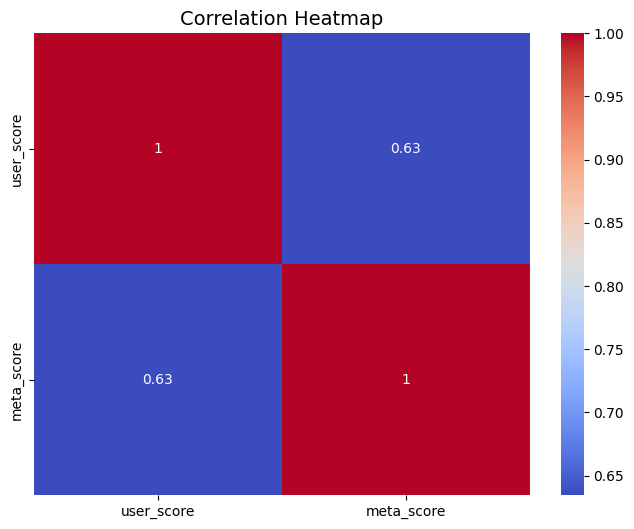

In [66]:
# Select the relevant columns for correlation
correl_data = df_clean[['user_score', 'meta_score']]

# Compute the correlation matrix
correlation_matrix = correl_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#Title
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

Keeping this moderate correlation in mind, we can start visualizing the relationship between Scores & Copies Sold

### Visualizations

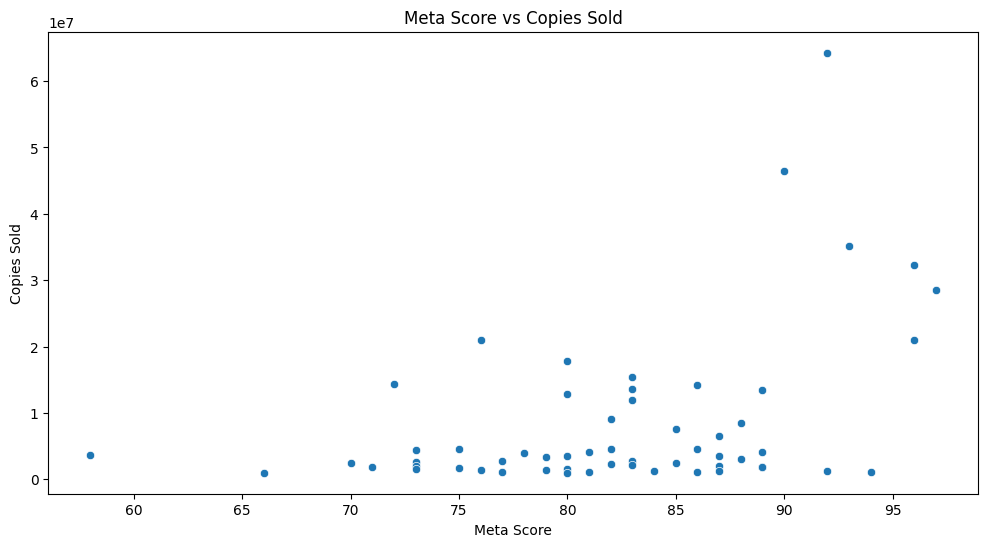

In [47]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sales_df, x='Meta Score', y='Copies Sold')
plt.title('Meta Score vs Copies Sold')
plt.show()

Now for User Score

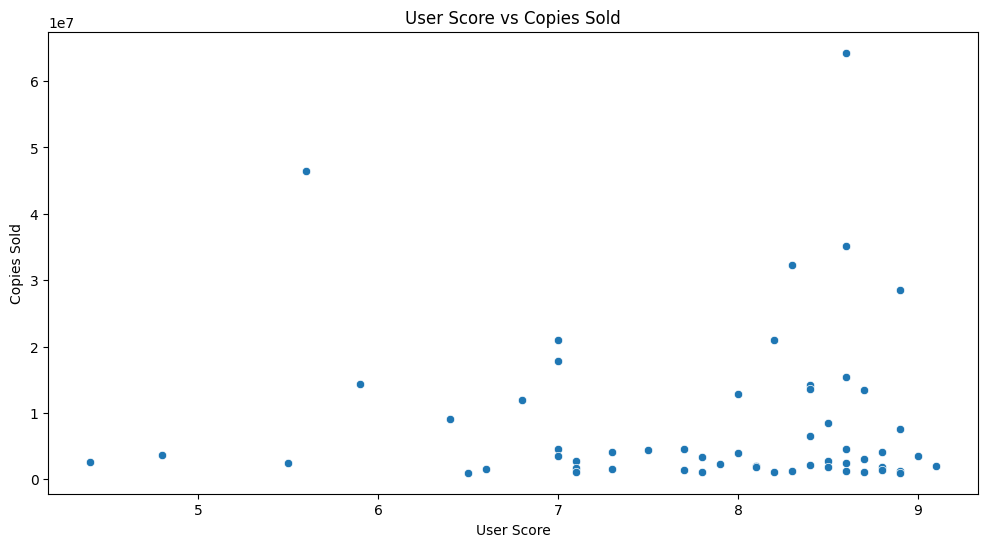

In [50]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sales_df, x='User Score', y='Copies Sold')
plt.title('User Score vs Copies Sold')
plt.show()

Because the range of the Copies Sold column is so high, we can use a log of the Copies Sold to better visualize the relationships

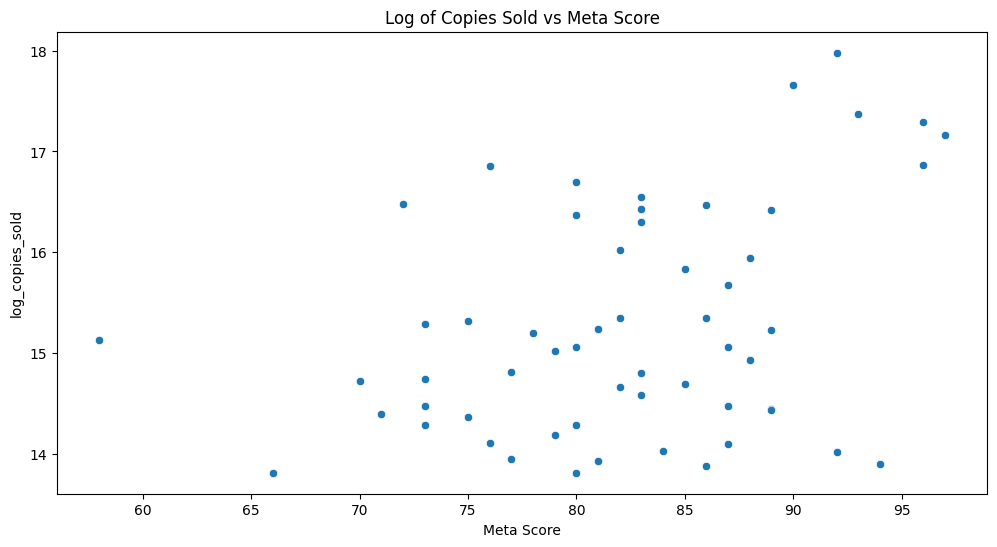

In [48]:
sales_df['log_copies_sold'] = np.log1p(sales_df['Copies Sold'])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=sales_df, x='Meta Score', y='log_copies_sold')
plt.title('Log of Copies Sold vs Meta Score')
plt.show()

Now we do the same for User Score

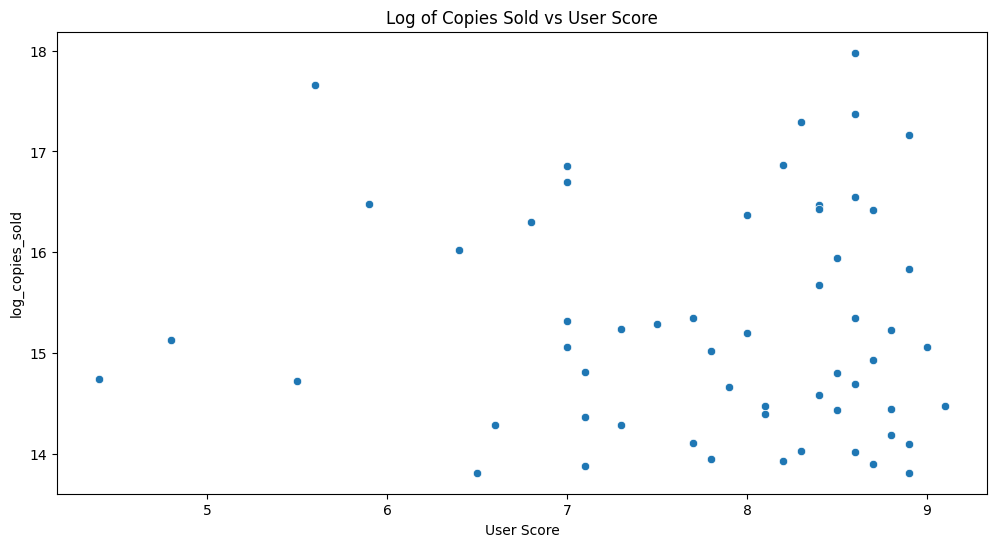

In [55]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sales_df, x='User Score', y='log_copies_sold')
plt.title('Log of Copies Sold vs User Score')
plt.show()

Now we use boplots to better understand the relationship between scores & copies sold

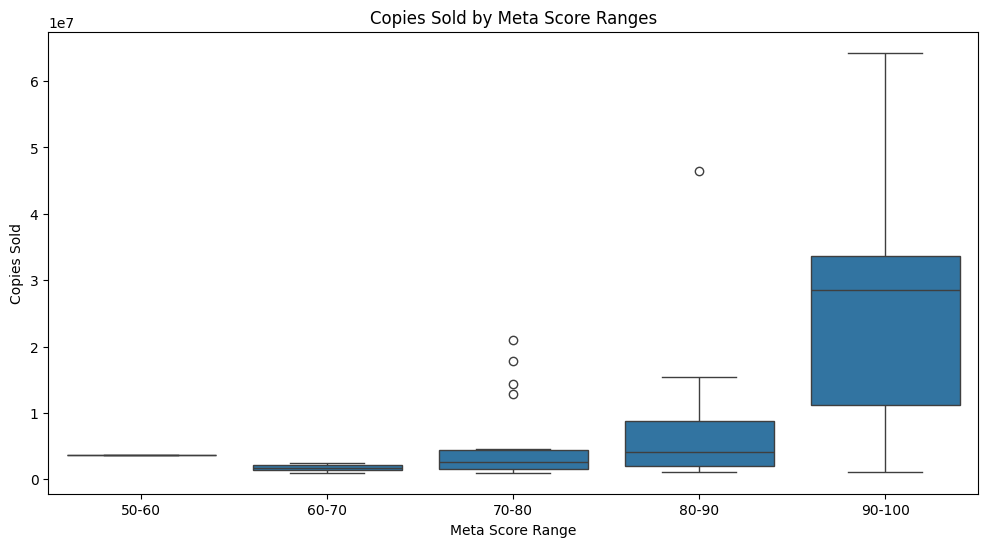

In [54]:
# Create bins for "Meta Score"
sales_df['Meta Score Bin'] = pd.cut(sales_df['Meta Score'], bins=[50, 60, 70, 80, 90, 100], labels=['50-60', '60-70', '70-80', '80-90', '90-100'])

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=sales_df, x='Meta Score Bin', y='Copies Sold')
plt.title('Copies Sold by Meta Score Ranges')
plt.xlabel('Meta Score Range')
plt.show()


Now for user score

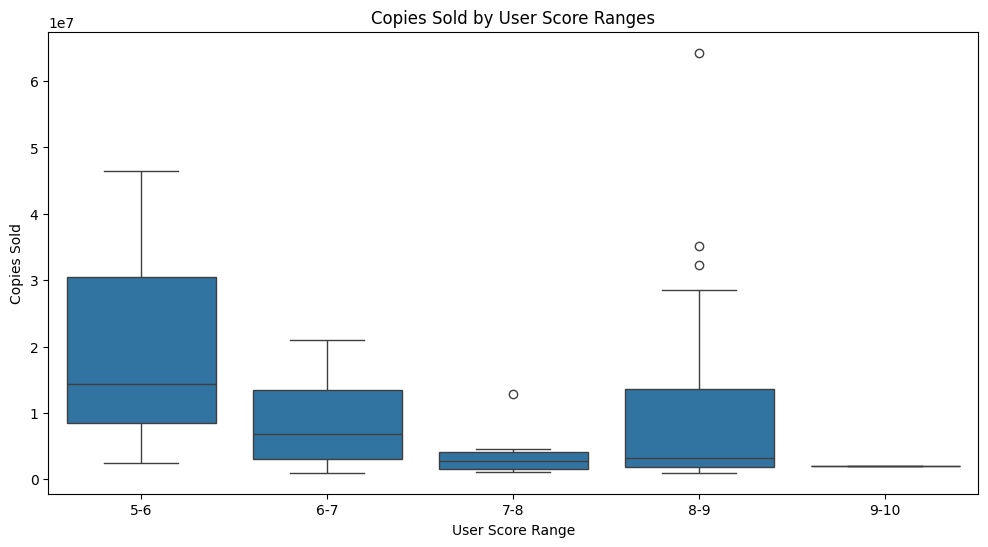

In [52]:
# Create bins for "User Score"
sales_df['User Score Bin'] = pd.cut(sales_df['User Score'], bins=[5, 6, 7, 8, 9, 10], labels=['5-6', '6-7', '7-8', '8-9', '9-10'])

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=sales_df, x='User Score Bin', y='Copies Sold')
plt.title('Copies Sold by User Score Ranges')
plt.xlabel('User Score Range')

plt.show()


We can also make a heatmap to show the correlation between our viewed variables

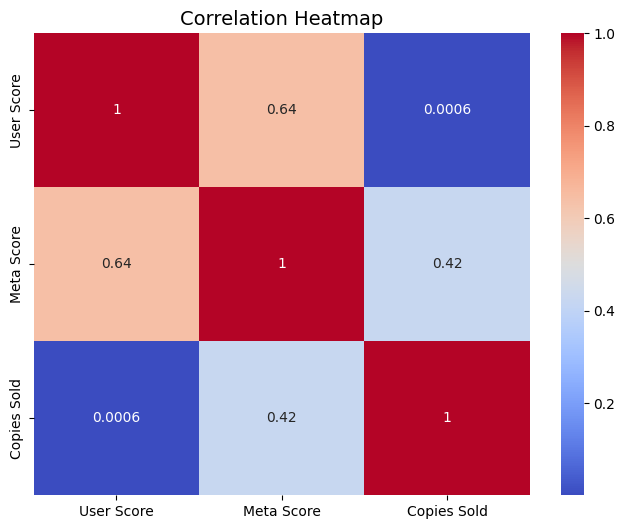

In [71]:
# Select the relevant columns for correlation
correlation_data = sales_df[['User Score', 'Meta Score', 'Copies Sold']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#Title
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

To conclude this section: We see a moderate correlation between User Score & Meta Score, as well as Meta Score & Copies Sold. However, we see a very weak correlation between User Score & Copies Sold. Further examination of Genre and Meta Score will be conducted in order to attempt to make actionable insights.